# Import Libraries 


In [3]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=a436543a7170c7f6fe30561dffeb6e9670b7eb3657b811e177f1c8bea7a2f9e8
  Stored in directory: c:\users\kulka\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [8]:
df=pd.read_excel('Stock_Price_data_set.xlsx.xlsx',index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [9]:
#Get number of rows and columns in data set
df.shape

(1009, 6)

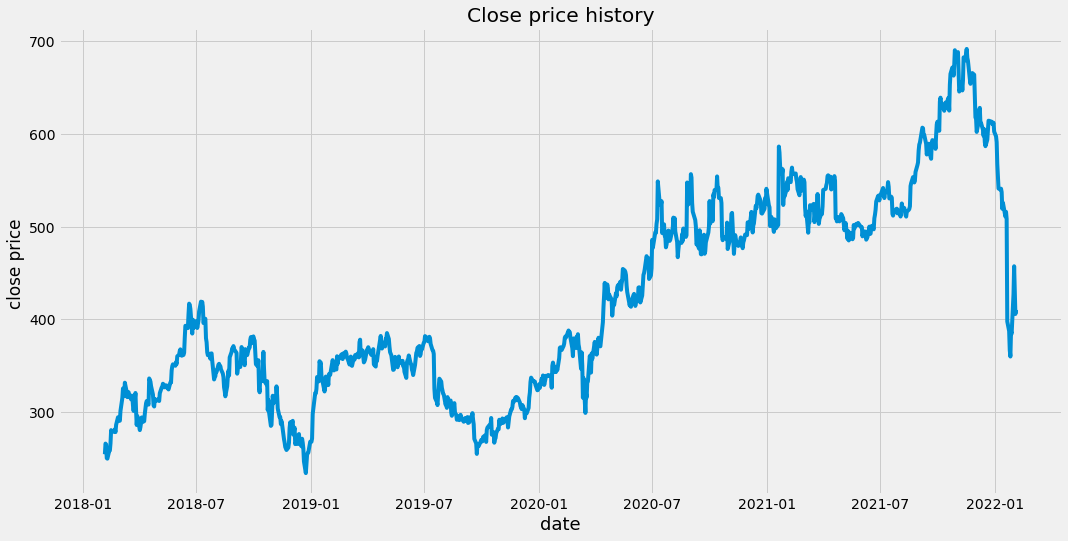

In [10]:
#visualization of the closing histry
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price ')
plt.show()

In [11]:
#create a new dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe into numpy arry
dataset=data.values
#get the number of rows to train the model
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len
training_data_len

808

In [12]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [13]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [14]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [15]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [16]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 32s 33ms/step - loss: 0.0034


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kulka\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-a

In [19]:
#create the testiong data set
#create the new arry containing scaled values from index 
test_data=scaled_data[training_data_len-60:,:]
#create the data set x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
#convert data into numpy
x_test=np.array(x_test)

In [21]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [22]:
#get the model predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

7/7 [==============================] - 2s 22ms/step


array([[546.42706],
       [541.0945 ],
       [535.17053],
       [530.0305 ],
       [525.31757],
       [521.4245 ],
       [518.58923],
       [517.01886],
       [515.8041 ],
       [514.3253 ],
       [512.1778 ],
       [510.27597],
       [509.09824],
       [506.68405],
       [504.78745],
       [502.29965],
       [499.96875],
       [498.609  ],
       [497.416  ],
       [496.18396],
       [495.2061 ],
       [495.83942],
       [496.80338],
       [498.3569 ],
       [499.8778 ],
       [501.33475],
       [502.75327],
       [503.8952 ],
       [504.41083],
       [504.583  ],
       [503.5822 ],
       [502.65057],
       [501.8153 ],
       [500.8905 ],
       [499.36966],
       [497.8694 ],
       [496.67288],
       [496.85446],
       [496.88754],
       [496.92853],
       [497.55576],
       [498.6377 ],
       [499.4593 ],
       [501.25677],
       [503.71255],
       [506.77252],
       [510.7068 ],
       [515.24304],
       [519.6447 ],
       [522.9964 ],


In [23]:
# get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.4851739007501568

C:\Users\kulka\AppData\Local\Temp\ipykernel_2120\2617299793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


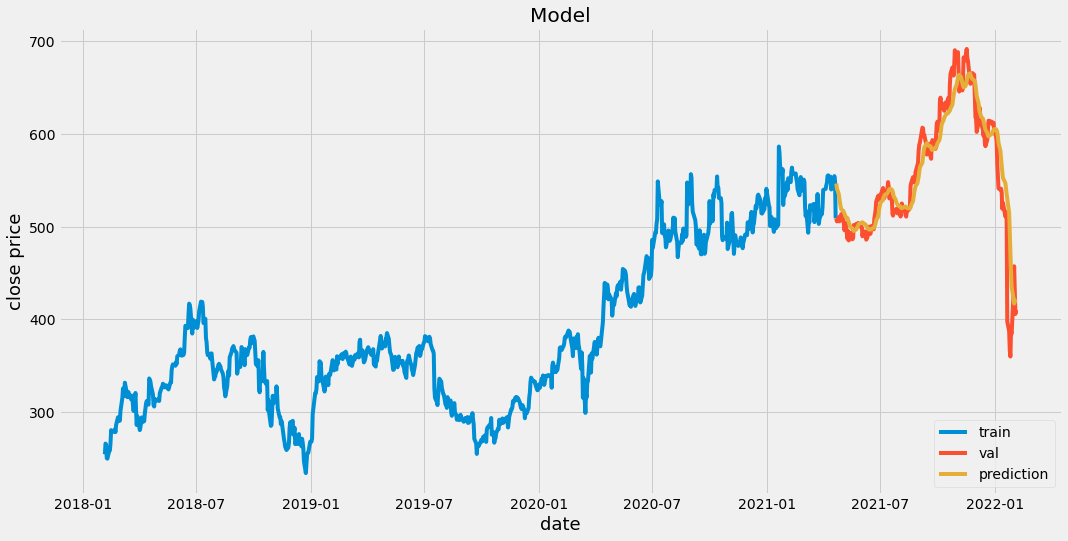

In [24]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualization of data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','prediction'],loc='lower right')
plt.show()

In [25]:
# show the valid and actual prices
valid

,Close,predictions
Date,,
2021-04-22,508.779999,546.427063
2021-04-23,505.549988,541.094482
2021-04-26,510.299988,535.170532
2021-04-27,505.549988,530.030518
2021-04-28,506.519989,525.317566
...,...,...
2022-01-31,427.140015,422.205902
2022-02-01,457.130005,416.826904
2022-02-02,429.480011,418.748199
